In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [71]:
data=pd.read_csv("income.csv")
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [72]:
data.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [74]:
data.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [75]:
data.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

Text(0, 0.5, 'Income($)')

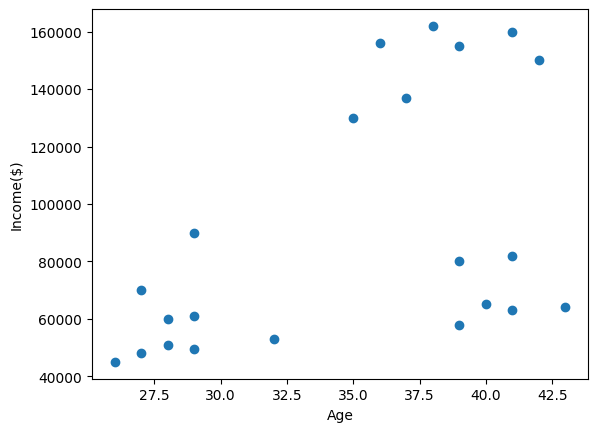

In [76]:
plt.scatter(data['Age'],data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
##sns.scatterplot(x='Age',y='Income($)',data=data)

In [77]:
x=data[['Age','Income($)']]

In [78]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km.fit(x)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [79]:
prediction = km.predict(x)
prediction

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [80]:
data['cluster']=prediction
data['cluster']

0     0
1     2
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    2
20    2
21    0
Name: cluster, dtype: int32

In [81]:
data1=data[data['cluster']==0]
data2=data[data['cluster']==1]
data3=data[data['cluster']==2]

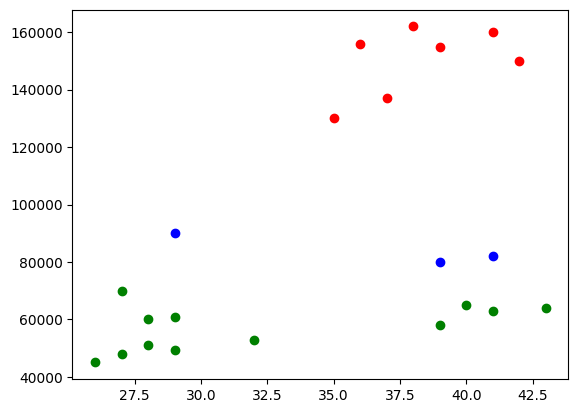

In [82]:
plt.scatter(data1['Age'],data1['Income($)'],color="Green")
plt.scatter(data2['Age'],data2['Income($)'],color="Red")
plt.scatter(data3['Age'],data3['Income($)'],color="Blue")

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [84]:
scaler=StandardScaler()
scaler.fit(data[['Age']])
data["Age"]=scaler.transform(data[["Age"]])
scaler.fit(data[['Income($)']])
data["Income($)"]=scaler.transform(data[["Income($)"]])

In [85]:
data.describe()

,Age,Income($),cluster
count,2.200000e+01,2.200000e+01,22.000000
mean,-3.482063e-16,1.059758e-16,0.590909
std,1.023533e+00,1.023533e+00,0.734140
min,-1.529504e+00,-1.068841e+00,0.000000
25%,-1.009157e+00,-7.512363e-01,0.000000
50%,2.917096e-01,-5.394999e-01,0.000000
75%,8.554186e-01,1.054404e+00,1.000000
max,1.419128e+00,1.683732e+00,2.000000


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       22 non-null     object 
 1   Age        22 non-null     float64
 2   Income($)  22 non-null     float64
 3   cluster    22 non-null     int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 748.0+ bytes


In [87]:
x=data[['Age','Income($)']]

In [88]:
x

,Age,Income($)
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417
5,0.725332,1.519048
6,1.072230,1.636679
7,0.551883,1.683732
8,0.204985,1.542574
9,0.031536,0.930891


In [89]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km.fit(x)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [90]:
prediction = km.predict(x)
prediction

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [91]:
data['cluster']=prediction
data['cluster']

0     1
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    1
13    1
14    1
15    1
16    2
17    2
18    2
19    2
20    2
21    2
Name: cluster, dtype: int32

In [92]:
data1=data[data['cluster']==0]
data2=data[data['cluster']==1]
data3=data[data['cluster']==2]

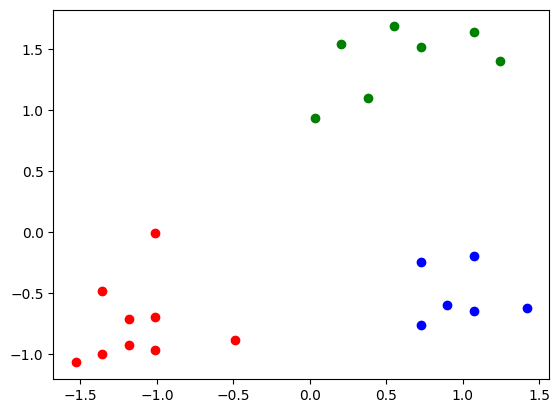

In [93]:
plt.scatter(data1['Age'],data1['Income($)'],color="Green")
plt.scatter(data2['Age'],data2['Income($)'],color="Red")
plt.scatter(data3['Age'],data3['Income($)'],color="Blue")

In [94]:
sse=[]
for k in range(1,11):
    km=KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

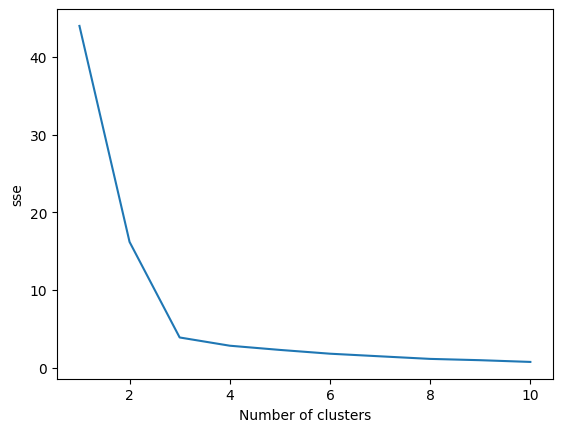

In [95]:
plt.plot(range(1,11),sse)
plt.xlabel("Number of clusters")
plt.ylabel("sse")
plt.show()

In [96]:
from sklearn.datasets import make_blobs

In [97]:
x,y = make_blobs(n_samples=300,centers=3,n_features=2)

In [98]:
x

array([[ -2.5673698 ,  -5.68387726],
       [ -5.36874503,  -5.85812991],
       [  0.99338171,  -8.48253762],
       [  1.76183229,  -8.92871641],
       [  2.15219012,  -8.45759984],
       [ -3.6312591 ,  -5.51434309],
       [  2.49831329,   9.87697092],
       [  2.29180445,  -9.66470037],
       [ -3.62366183,  -6.89564413],
       [  0.3823934 ,   8.85353744],
       [  0.36989026,   9.03057958],
       [  1.04316814,   8.21405944],
       [  2.68768706,  -8.82306262],
       [ -4.48032708,  -7.37110463],
       [ -3.30280042,  -7.58415684],
       [  0.74502858,   8.96649281],
       [ -4.12863073,  -6.97928353],
       [ -4.6951065 ,  -6.60587   ],
       [  1.39005465,   7.53358191],
       [  1.65042757,  -8.70008581],
       [  1.21904188,   8.07638015],
       [  1.08694405,  10.82619068],
       [  0.99912409,   9.51501123],
       [ -0.47720759,   9.11244816],
       [ -4.4078387 ,  -7.06170782],
       [  2.10197741,  -8.58545027],
       [  3.15224722,  -9.26774936],
 

In [99]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km.fit(x)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [100]:
prediction = km.predict(x)
prediction

array([0, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 2, 1, 1,
       1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0,
       2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2,
       1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 1,
       0, 1, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 1, 2, 1, 1,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1,
       2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 0,
       0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2,
       0, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1,
       1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0,
       1, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0], d